In [8]:
import os
import cv2
import matplotlib.pyplot as plt

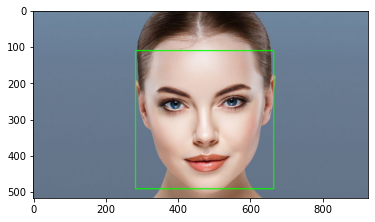

In [9]:
haar_path = os.path.join('..', 'models', 'haarcascade_frontalface_default.xml')
cascade = cv2.CascadeClassifier(haar_path)

cap = cv2.VideoCapture(0)


def detect_face(frame, cascade):
    frame_g = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cascade.detectMultiScale(frame_g, 1.3, 5)
    if len(face) == 0:
        return frame
    
    x, y, w, h = face[0]
    
    frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

img = cv2.imread('example_face.jpg')
frame = detect_face(img, cascade)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [10]:
while True:
    _, frame = cap.read()
    frame = detect_face(frame, cascade)
    cv2.imshow('Output', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()